In [1]:
from pathlib import Path
from shutil import move

import nibabel as nib
import numpy as np

from nipype.interfaces import fsl
from tqdm.notebook import tqdm
from brats.utils import show_mri

220927-17:13:15,433 nipype.utils WARNING:
	 A newer version (1.8.4) of nipy/nipype is available. You are using 1.6.0


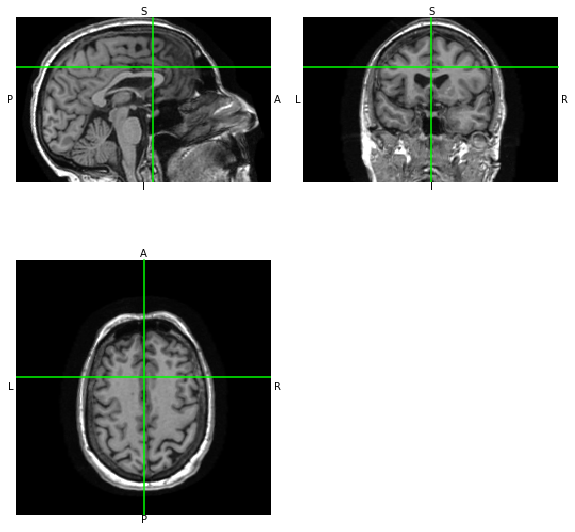

In [15]:
fp = '/home/jupyter/gama/nnUNet/data/raw/nnUNet_raw_data/Task112_ADNI_MAPER/imagesTr/ADNI_MAPER_100_0000.nii.gz'
show_mri(fp, pos=(0,0,40))

In [10]:
%%time

fastr = fsl.FAST()
fastr.inputs.in_files = fp
fastr.inputs.img_type = 1
fastr.inputs.number_classes = 3
fastr.inputs.out_basename = 'fast_'
out = fastr.run()
out

KeyboardInterrupt: 

In [13]:
!fast -n 3 -t 1 -o /home/jupyter/gama/nnUNet/data/raw/nnUNet_raw_data/Task113_ADNI_BrainSeg/labelsTr/ADNI_BrainSeg_ /home/jupyter/gama/nnUNet/data/raw/nnUNet_raw_data/Task113_ADNI_BrainSeg/imagesTr/ADNI_MAPER_100_0000.nii.gz

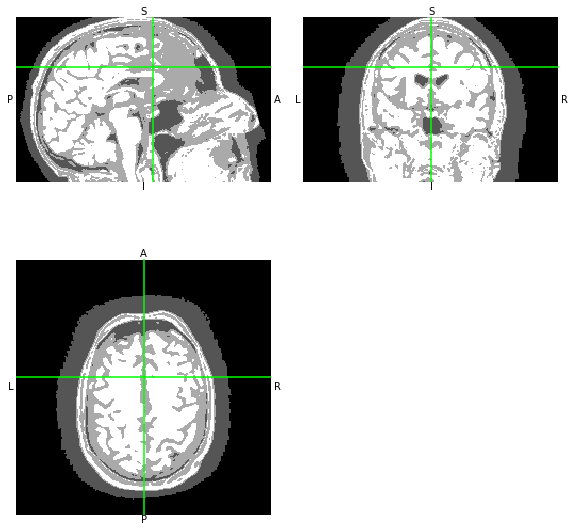

In [14]:
show_mri('/home/jupyter/gama/nnUNet/data/raw/nnUNet_raw_data/Task113_ADNI_BrainSeg/labelsTr/ADNI_BrainSeg__seg.nii.gz', pos=(0,0,40))

In [48]:
tcm = nib.load(out.outputs.tissue_class_map).get_fdata()
np.unique(tcm.flatten())

array([0., 1., 2., 3.])

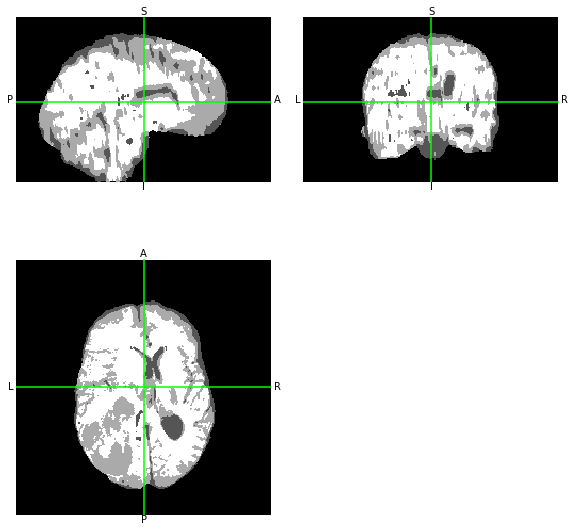

In [47]:
show_mri(out.outputs.partial_volume_map, pos=(-120,-120+239,75))

In [49]:
tcm = nib.load(out.outputs.partial_volume_map).get_fdata()
np.unique(tcm.flatten())

array([0., 1., 2., 3.])

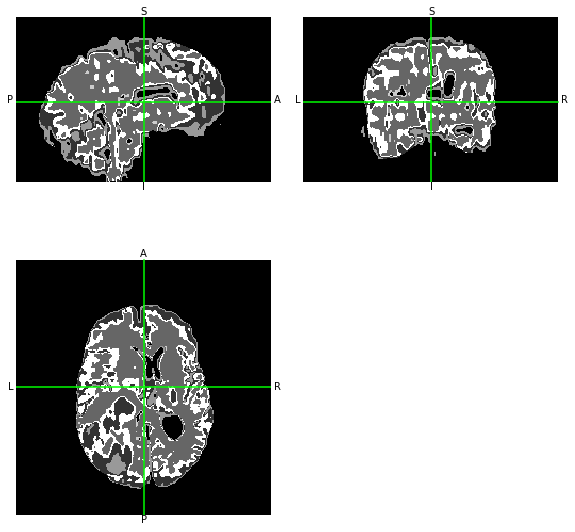

In [50]:
show_mri(out.outputs.mixeltype, pos=(-120,-120+239,75))

In [51]:
tcm = nib.load(out.outputs.mixeltype).get_fdata()
np.unique(tcm.flatten())

array([0., 1., 2., 3., 4., 5.])

# Seg of BraTS2020 data

In [ ]:
t1_fpaths = Path('/home/bruno-pacheco/brats-generalization/data/raw/nnUNet_raw_data/Task111_BraTS2020_BrainSeg_T1T2/imagesTr').glob('*_0000.nii.gz')

for t1_fpath in tqdm(list(t1_fpaths)):
    fastr = fsl.FAST()
    fastr.inputs.in_files = str(t1_fpath)
    fastr.inputs.img_type = 1
    fastr.inputs.number_classes = 3
    fastr.inputs.out_basename = 'fast_'
    r = fastr.run()
    
    move(r.outputs.tissue_class_map, str(t1_fpath).replace('imagesTr','labelsTr').replace('_0000',''))
    
    !rm fast_*.nii.gz